In [2]:
# set auto reload imported modules tagged
%load_ext autoreload
%autoreload 2

# add custom python packages directory to path
import sys
sys.path.append('/home/brendan/dev/packages')

# import pvlibs libraries
import pvlibs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# data array processing
import numpy as np

from scipy import optimize

# plotting with matplotlib, inline interactive notebook
%matplotlib notebook
from matplotlib import pyplot as plt
# default style / theme
from jupyterthemes import jtplot; jtplot.style()


In [4]:
## initialise database

# generate blank database
db = pvlibs.init()


## initialise devices in database

# define sample details gerneral to all samples
params = {'wafer_type': 'mono',
          'wafer_doping_type': 'p-type', # wafer doping type ['p-type'|'n-type']
         }

# define list of samples by id with sample details for each that vary between devices
devices = ['1', '2', '3', '4', '5', '6']
# define parameters unique to subset of devices
#params = {**params, 'diffusion': 'unknown'}

# generate device nodes and store in database
pvlibs.init_device_list(_db = db, _devices = devices, _params = params)


## initialise processes

# define unique process id
process_id = 'dr_laser_hydro'
# define process parameters
_params = {'process_tool': 'dr_laser', 'process_type': 'hydrogenation', 'illumination_intensity': 100., 'duration': 10., 'temperature': 400.}
# generate process node and store in database
process_index = pvlibs.init_process(_db = db, _process_id = process_id, _params = _params)

# define unique process id
process_id = 'dr_laser_stab'
# define process parameters
_params = {'process_tool': 'dr_laser', 'process_type': 'stability', 'illumination_intensity': 100., 'duration': 30.}
# generate process node and store in database
process_index = pvlibs.init_process(_db = db, _process_id = process_id, _params = _params)


## build device states

# define unique device state parameters general to all devices
params = {'wafer_area': .24426, # wafer area [ / cm^2]
          'wafer_resistivity': 1.21, # wafer resistivity [Ohms.cm]
          'wafer_thickness': 0.0175, # wafer thickness [cm]
          'wafer_optical_const': 1.0, # wafer optical constant []
}

# define device state id
device_state_id = 'initial'
# define related processes performed prior to state by process id
processes = []
# generate device state nodes and store in database
device_state_index = pvlibs.init_device_state_list(_db = db, _device_state_id = device_state_id, _devices = devices,
                                                   _params = params, _processes = processes)

# define device state id
device_state_id = 'post_hydro'
# define related processes performed prior to state by process id
processes = []
# generate device state nodes and store in database
device_state_index = pvlibs.init_device_state_list(_db = db, _device_state_id = device_state_id, _devices = devices,
                                                   _params = params, _processes = processes)

# define device state id
device_state_id = 'post_stab'
# define related processes performed prior to state by process id
processes = ['dr_laser_hydro', 'dr_laser_stab']
# generate device state nodes and store in database
device_state_index = pvlibs.init_device_state_list(_db = db, _device_state_id = device_state_id, _devices = devices,
                                                   _params = params, _processes = processes)


In [5]:
## batch import sinton lifetime data

# define measurement type and file format
file_format = {'measurement':'sinton_lifetime', 'file_extension': 'ltr', 'equipment': 'bti'}

# define measurement files directory for import
base_path = './data/LT/LT-hydrogenation/init-hq-g4'
# define filename parse string
parse_string = 'init-hq-g4-(?P<illumination_mode>(gen|trans))-d(?P<device_id>\d)-(?P<wafer_region>\d{2})\..*$'

# define measurement parameters
params = {'device_state_id': 'initial', 'temperature': 298.}
# run quick import files protocol
pvlibs.import_measurement_data_files(_db = db, _file_format = file_format, _base_path = base_path,
    _parse_string = parse_string, _params = params)


# define measurement files directory for import
base_path = './data/LT/LT-hydrogenation/post-hydro-hq-g4/'
# define filename parse string
parse_string = 'post-hydro-hq-g4-(?P<illumination_mode>(gen|trans))-d(?P<device_id>\d)-(?P<wafer_region>\d{2})\..*$'

# define measurement parameters
params = {'device_state_id': 'post_hydro', 'temperature': 298.}
# run quick import files protocol
pvlibs.import_measurement_data_files(_db = db, _file_format = file_format, _base_path = base_path,
    _parse_string = parse_string, _params = params)


# define measurement files directory for import
base_path = './data/LT/LT-hydrogenation/post-stab-hq-g4/'
# define filename parse string
parse_string = 'post-stab-hq-g4-(?P<illumination_mode>(gen|trans))-d(?P<device_id>\d)-(?P<wafer_region>\d{2})\..*$'

# define measurement parameters
params = {'device_state_id': 'post_stab', 'temperature': 298.}
# run quick import files protocol
pvlibs.import_measurement_data_files(_db = db, _file_format = file_format, _base_path = base_path,
    _parse_string = parse_string, _params = params)


successful import data from file: init-hq-g4-gen-d3-05.ltr
successful import data from file: init-hq-g4-gen-d2-04.ltr
successful import data from file: init-hq-g4-gen-d2-01.ltr
successful import data from file: init-hq-g4-gen-d3-01.ltr
successful import data from file: init-hq-g4-gen-d5-05.ltr
successful import data from file: init-hq-g4-gen-d1-02.ltr
successful import data from file: init-hq-g4-gen-d4-03.ltr
successful import data from file: init-hq-g4-gen-d2-05.ltr
successful import data from file: init-hq-g4-gen-d5-03.ltr
successful import data from file: init-hq-g4-gen-d4-04.ltr
successful import data from file: init-hq-g4-gen-d3-04.ltr
successful import data from file: init-hq-g4-gen-d6-04.ltr
successful import data from file: init-hq-g4-gen-d1-01.ltr
successful import data from file: init-hq-g4-gen-d4-05.ltr
successful import data from file: init-hq-g4-gen-d5-04.ltr
successful import data from file: init-hq-g4-gen-d6-02.ltr
successful import data from file: init-hq-g4-gen-d1-04.l

In [6]:

## process all imported measurement data nodes

# define measurement processing details
process = {'measurement': 'sinton_lifetime', 'process': 'standard'}

# iterate all measurement data nodes by index
for i in range(len(db['measurement'])):
    
    # perform measurement data processing and return results
    results_index = pvlibs.process_measurement_data(_db = db, _index = i, _process = process)


## Lifetime Modelling

In [181]:

export = []

# match measurement by each sample_id, sample_state_id, and specific measurement parameters (type, etc.)
for sample_state_id in ['initial', 'post_hydro', 'post_stab']:

    for sample_id in ['1', '2', '3', '4', '5', '6']:
        
        for wafer_region in ['01', '02', '03', '04', '05']:

            params = {'device_id': sample_id}
            sample_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'device', _params = params)[0]
            # get sample node
            sample = db['device'][sample_index]

            params = {**params, 'device_state_id': sample_state_id}
            sample_state_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'device_state', _params = params)[0]
            # get sample state node
            sample_state = db['device_state'][sample_state_index]

            params = {**params, 'measurement_type': 'sinton_lifetime', 'wafer_region': wafer_region, 'illumination_mode': 'gen'}
            measurement_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'measurement', _params = params)[0]
            # get measurement data node
            measurement = db['measurement'][measurement_index]

            results_index = measurement['rels']['calc_results'][0]
            # get measurement data node
            results = db['calc_results'][results_index]

            model_params = {'model': 'std', 'nd_range': [1e14, 1e17]}

            # fit model to data, return recombination components and fit parameters
            rec = pvlibs.process_data.fit_model(_model_params = model_params, _sample = sample, _sample_state = sample_state, _measurement = measurement,
                                                _results = results)
            
            
            # export data
            np.savetxt(X = np.stack([results['data']['nd'], results['data']['tau']], axis = 1),
                       comments = '', delimiter = ',', fname = './results/{}-{}-{}.csv'.format(sample_state_id, sample_id, wafer_region[-1:]),
                       header = 'charge density, effective lifetime', fmt = '%s')
            
            
            #print('Surface Recombination Velocity (J_0) = {:.1f} [fa]\nBulk Lifetime (max) = {:.1f} [us]\nImplied Voc = {:.1f} [V]'.format(
            #    (rec['J_0'])*1e15, rec['t_blk']*1e6, results['data']['ivoc']*1e3))
            
            export.append([ sample_state_id, sample_id, wafer_region[-1:], (rec['J_0'])*1e15, rec['t_blk']*1e6, results['data']['ivoc']*1e3 ])
            


In [179]:

# export data
np.savetxt(X = np.stack(export, axis = 1).T, comments = '', delimiter = ',', fname = './results/values.csv',
           header = 'state, sample, region, J0, tblk, iVoc', fmt = '%s')


In [195]:

_head = ['state', 'sample', 'region', 'J0', 'tblk', 'iVoc']
_head


['state', 'sample', 'region', 'J0', 'tblk', 'iVoc']

In [197]:
head = ', '.join( [str(h) for h in _head] )
head

'state, sample, region, J0, tblk, iVoc'

<IPython.core.display.Javascript object>


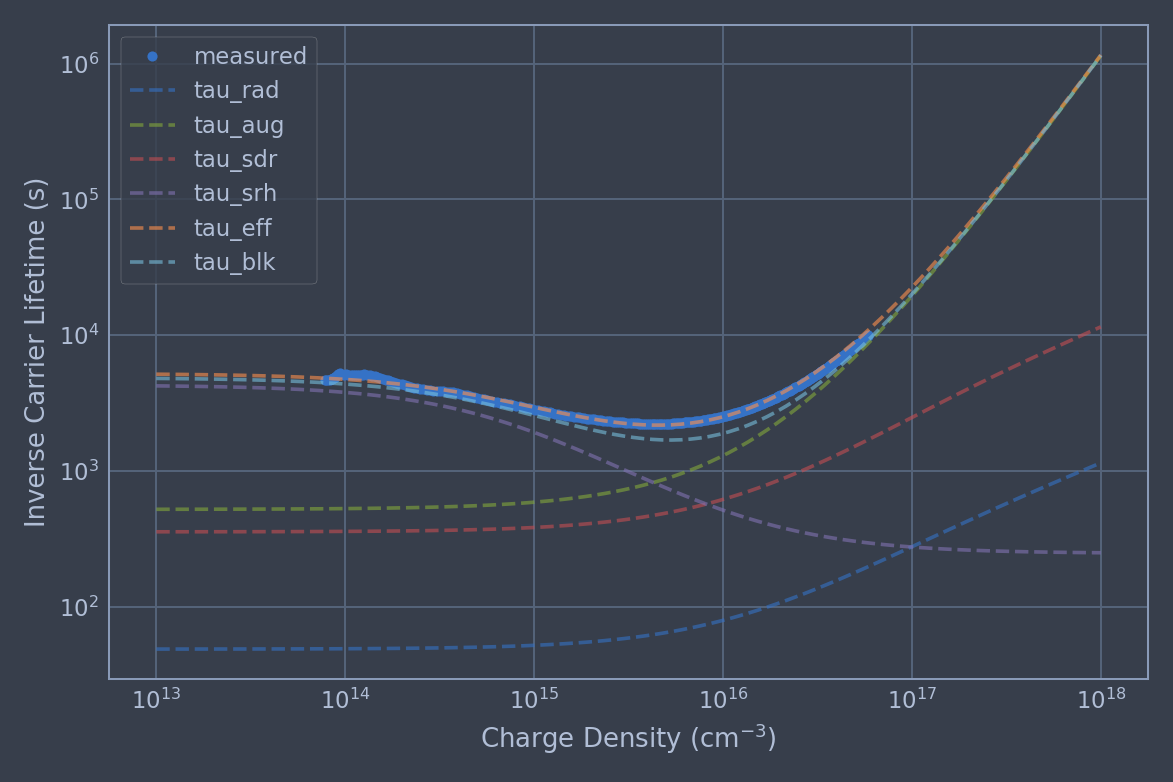

Surface Recombination Velocity (J_0) = 6.5 [fa]
Bulk Lifetime (max) = 592.9 [us]


In [8]:
# match measurement by each sample_id, sample_state_id, and specific measurement parameters (type, etc.)
sample_state_id = 'initial'
sample_id = '5'
wafer_region = '05'


params = {'device_id': sample_id}
sample_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'device', _params = params)[0]
# get sample node
sample = db['device'][sample_index]

params = {**params, 'device_state_id': sample_state_id}
sample_state_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'device_state', _params = params)[0]
# get sample state node
sample_state = db['device_state'][sample_state_index]

params = {**params, 'measurement_type': 'sinton_lifetime', 'wafer_region': wafer_region, 'illumination_mode': 'gen'}
measurement_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'measurement', _params = params)[0]
# get measurement data node
measurement = db['measurement'][measurement_index]

results_index = measurement['rels']['calc_results'][0]
# get measurement data node
results = db['calc_results'][results_index]


model_params = {'model': 'std', 'nd_range': [1e14, 1e17]}

# fit model to data, return recombination components and fit parameters
rec = pvlibs.process_data.fit_model(_model_params = model_params, _sample = sample, _sample_state = sample_state, _measurement = measurement,
                                    _results = results)

# initialise figure and axes
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot(111)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Charge Density (cm$^{-3}$)')
#ax.set_ylabel(r'Charge Carrier Lifetime (s$^{-1}$)')
ax.set_ylabel(r'Inverse Carrier Lifetime (s)')

# plot measured charge density dependent effective lifetime
ax.plot(results['data']['nd'], results['data']['tau']**-1, 'ob', label = 'measured')

# iterate and plot each model component
for name, tau in rec.items():
    if name[:4] == 'tau_':
        
        # plot charge density dependent recombination lifetime component
        ax.plot(rec['dn'], tau**-1 , '--', label = '{}'.format(name), linewidth = 2, alpha = 0.6)


# display figure
plt.legend()
plt.tight_layout()
plt.show()

# print J_0, tau_blk
print('Surface Recombination Velocity (J_0) = {:.1f} [fa]\nBulk Lifetime (max) = {:.1f} [us]'.format((rec['J_0'])*1e15,
                                                                                                     rec['t_blk'].max()*1e6))

<IPython.core.display.Javascript object>


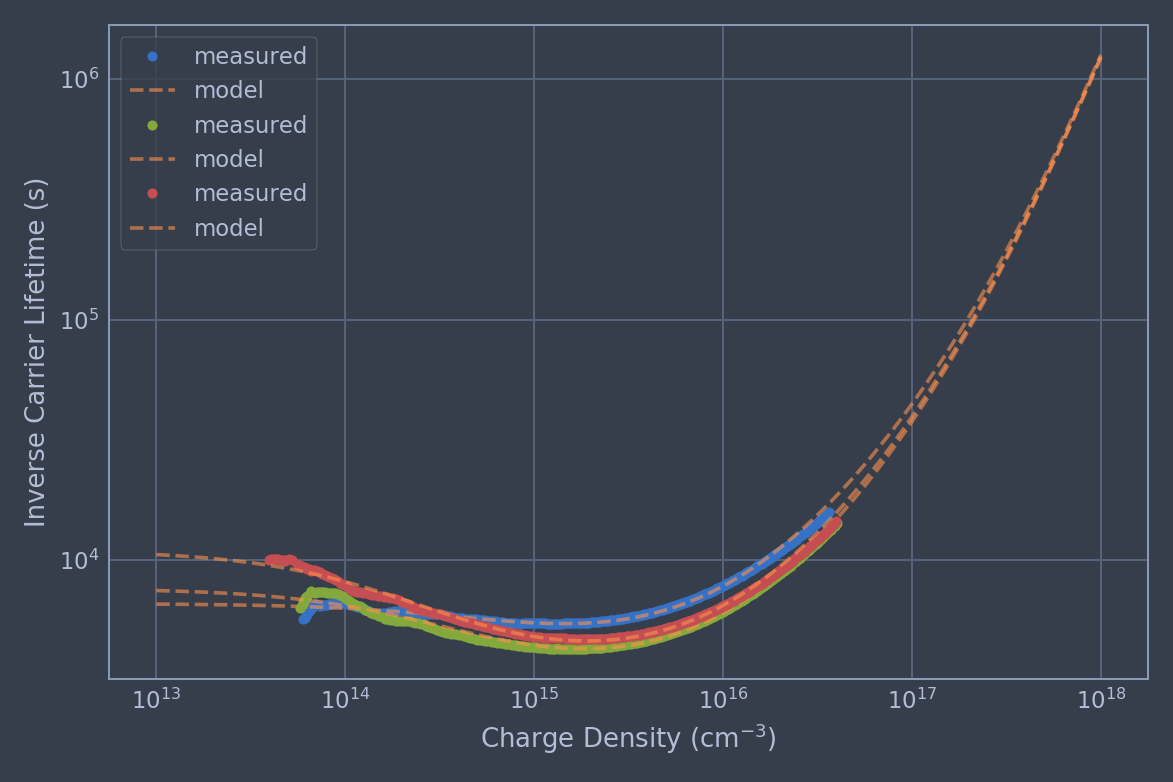

Surface Recombination Velocity (J_0) = 64.9 [fa]
Bulk Lifetime (max) = 772.9 [us]
Surface Recombination Velocity (J_0) = 46.7 [fa]
Bulk Lifetime (max) = 811.1 [us]
Surface Recombination Velocity (J_0) = 51.4 [fa]
Bulk Lifetime (max) = 801.8 [us]


In [155]:

# initialise figure and axes
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot(111)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Charge Density (cm$^{-3}$)')
#ax.set_ylabel(r'Charge Carrier Lifetime (s$^{-1}$)')
ax.set_ylabel(r'Inverse Carrier Lifetime (s)')


for sample_state_id in ['initial', 'post_hydro', 'post_stab']:

    # match measurement by each sample_id, sample_state_id, and specific measurement parameters (type, etc.)
    sample_id = '3'
    wafer_region = '01'
    #sample_state_id = 'post_hydro'

    params = {'device_id': sample_id}
    sample_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'device', _params = params)[0]
    # get sample node
    sample = db['device'][sample_index]

    params = {**params, 'device_state_id': sample_state_id}
    sample_state_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'device_state', _params = params)[0]
    # get sample state node
    sample_state = db['device_state'][sample_state_index]

    params = {**params, 'measurement_type': 'sinton_lifetime', 'wafer_region': wafer_region, 'illumination_mode': 'gen'}
    measurement_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'measurement', _params = params)[0]
    # get measurement data node
    measurement = db['measurement'][measurement_index]

    results_index = measurement['rels']['calc_results'][0]
    # get measurement data node
    results = db['calc_results'][results_index]


    model_params = {'model': 'std', 'nd_range': [1e13, 1e17]}

    # fit model to data, return recombination components and fit parameters
    rec = pvlibs.process_data.fit_model(_model_params = model_params, _sample = sample, _sample_state = sample_state, _measurement = measurement,
                                        _results = results)

    # print J_0, tau_blk
    print('Surface Recombination Velocity (J_0) = {:.1f} [fa]\nBulk Lifetime (max) = {:.1f} [us]'.format(rec['J_0']*1e15,
                                                                                                         rec['t_blk']*1e6))
    
    # plot measured charge density dependent effective lifetime
    ax.plot(results['data']['nd'], results['data']['tau']**-1, 'o', label = 'measured')

    # plot charge density dependent recombination lifetime component
    ax.plot(rec['dn'], rec['tau_eff']**-1 , '--y', label = '{}'.format(name), linewidth = 2, alpha = 0.6)
    
    # iterate and plot each model component
    if False:
        for name, tau in rec.items():
            if name[:4] == 'tau_' and name != 'tau_eff':

                # plot charge density dependent recombination lifetime component
                ax.plot(rec['dn'], tau**-1 , '--', label = '{}'.format(name), linewidth = 2, alpha = 0.6)


# display figure
#plt.legend(loc = 'lower left')
plt.legend()
plt.tight_layout()
plt.show()


### updated processing

In [ ]:

# sample state
# independent variables
# dependent variables (relative to index variable)

# e.g. index time / photo-conductance / charge density
# derivative calculations using independent variables and dependent variable



In [ ]:

# data node
## meta - details of processes performed, data contained, relations to other nodes
## vars - independent state variables
## data - dependent state variables


### state (inpependent)
    ## wafer state variables
        # wafer parameters (dimensions, doping densities, diffusions and surface layers)
        # temperature dependent wafer parameters (intrinsic properties)

### environment state (variable)
    ## measurement data variables
        # invariant measurement parameters (temperature)
        # variable measurement parameters (time, illumination intensity)
            # measured dependent variable response (photoconductance)

### model (derivative, dependent)
    ## state in environment
        # invariant inputs
        # variable inputs
            # dependent variable
                # dependent results


# static variables - names and values
# dynamic variable - name, values as index array
# dependent variables - headers, values as array aligned to index


## hierarchy of dependencies, independent variables (constants), state variables (variable or environment dependent), derivative state values

# complete list top level variables (dimensions), stateless
    # select state, subset of variables, select single dynamic dependent variable, fixed value of remaining static variables
        # calculate derivative dependent variables for state

        
#
# for given state as dict:
    # static: dict of independent state variables each as name:value
    # dynamic: dict of dependent variables each as name: (value)
        # each entry value as dict with:
            # 'headers': names (list) for each values array
            # 'data': values as 2d array with dependent variable as index values



# node
    # params: state description (id, tags), metadata (data source, processes performed), searchable details (key and value)
    # rels: relations to other nodes (relation name, related node type, related node index)
    # data: state data including: input static variables, dynamic variables with derivative dependent variable values,
        # model output static variables
            

In [101]:
# define sample state, sample id, and sample region for search
sample_state_id = 'initial'
sample_id = '1'
wafer_region = '01'

# define sample parameters for search / filter
params = {'device_id': sample_id}
sample_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'device', _params = params)[0]
# get sample node
sample = db['device'][sample_index]

# define sample state parameters for search / filter
params = {'device_id': sample_id,
          'device_state_id': sample_state_id}
sample_state_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'device_state', _params = params)[0]
# get sample state node
sample_state = db['device_state'][sample_state_index]

# define measurement parameters for search / filter
params = {'device_id': sample_id,
          'device_state_id': sample_state_id,
          'wafer_region': wafer_region,
          'measurement_type': 'sinton_lifetime',
          'illumination_mode': 'gen'}
measurement_index = pvlibs.database.get_index_hard_match_params(_db = db, _type = 'measurement', _params = params)[0]
# get measurement data node
measurement = db['measurement'][measurement_index]

# get results by measurement relation
results_index = measurement['rels']['calc_results'][0]
# get measurement data node
results = db['calc_results'][results_index]


In [107]:
sample['params'].keys()

dict_keys(['device_id', 'wafer_type', 'wafer_doping_type'])

In [108]:
sample_state['params'].keys()

dict_keys(['device_state_id', 'wafer_area', 'wafer_resistivity', 'wafer_thickness', 'wafer_optical_const', 'device_id'])

In [104]:
measurement['data'].keys()

dict_keys(['time', 'conductance', 'illumination'])

In [105]:
measurement['params'].keys()

dict_keys(['measurement_type', 'datetime', 'operator', 'device_region', 'device_state_id', 'temperature', 'illumination_mode', 'device_id', 'wafer_region', 'file_name', 'measurement_subtype'])

In [103]:
results['data'].keys()

dict_keys(['time', 'conductance', 'illumination', 'wafer_doping_density', 'charge_density', 'charge_generation', 'lifetime', 'implied_suns'])

In [110]:

# sample variables: 'wafer_doping_type', 'wafer_resistivity', 'wafer_thickness', 'wafer_area', 'wafer_optical_const',
# calculate 'wafer_doping_density' from 'wafer_doping_type', 'wafer_resistivity'

# measurement variables: 'illumination_mode', 'time', 'conductance', 'illumination'
# calculate 'charge_generation' from 'illumination', 'wafer_optical_const'
# calculate 'charge_density' from 'wafer_doping_density', 'conductance', 'wafer_thickness'
# calculate 'lifetime' from 'charge_density', ('illumination_mode', 'time', 'charge_generation', 'wafer_thickness')
# calculate 'implied_suns' from 'charge_density', 'lifetime', 'wafer_thickness', 'wafer_optical_const'

# state variables: 'temperature'
# calculate 'intrinsic_carrier_density' from 'temperature', 'wafer_doping_density'

# calculate 'effective_intrinsic_carrier_density' from 'intrinsic_carrier_density', 'charge_density'
# calculate 'implied_voc' from 'charge_density', 'wafer_doping_density', 'effective_intrinsic_carrier_density', 'temperature'



In [137]:
# define measurement processing details
process = {'measurement': 'sinton_lifetime', 'process': 'standard'}
# perform measurement data processing and return results
a = pvlibs.process_data.sinton_lifetime.process_sinton_lifetime(_db = db, _index = 0, _process = process)
print(a['ivoc'])

0.6943092306451951


In [140]:
a.keys()

dict_keys(['N_D', 'N_A', 'nd', 'tau', 'isuns', 'n_i_eff', 'ivoc'])